In [1]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images
!pip install wandb
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 12202, done.
remote: Total 12202 (delta 0), reused 0 (delta 0), pack-reused 12202
Receiving objects: 100% (12202/12202), 11.44 MiB | 19.79 MiB/s, done.
Resolving deltas: 100% (8479/8479), done.
/content/yolov5
     |████████████████████████████████| 596 kB 12.5 MB/s 
     |████████████████████████████████| 138 kB 16.7 MB/s 
     |████████████████████████████████| 178 kB 38.5 MB/s 
     |████████████████████████████████| 1.1 MB 45.6 MB/s 
     |████████████████████████████████| 145 kB 51.4 MB/s 
     |████████████████████████████████| 67 kB 6.0 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have foliu

In [2]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [3]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [4]:
rf = Roboflow(api_key="mEB8plwTjutgOs8oaYzJ")
project = rf.workspace("shivam-sharma").project("yolo-object-h5pku")
dataset = project.version(20).download("yolov5")


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/Yolo-Object-20 in yolov5pytorch:: 100%|██████████| 8640/8640 [00:08<00:00, 967.25it/s] 


In [5]:
!python train.py --img 416 --batch -1 --epochs 300 --data {dataset.location}/data.yaml --weights last.pt --cfg yolov5m.yaml --cache

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 2
wandb: You chose 'Use an existing W&B account'
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
train: weights=, cfg=yolov5m.yaml, data=/content/datasets/Yolo-Object-20/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=-1, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox

In [ ]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/datasets/Yolo-Object-15/test/images, data=data/coco128.yaml, imgsz=[406, 406], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-69-g7830e91 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 20869098 parameters, 0 gradients, 48.0 GFLOPs
image 1/112 /content/datasets/Yolo-Object-15/test/images/00000022_jpg.rf.d4e9a26556b9fcb7916618a13f8f4c6c.jpg: 416x320 1 swivelchair, Done. (0.038s)
image 2/112 /content/datasets/Yolo-Object-15/test/images/00000027_jpg.rf.a8359ba6aaeea354ddceba06079fe69c.jpg: 416x256 1 chair, Done. (0.037s)
image 3/112 /content/datasets/Yolo-Object-15/test/image

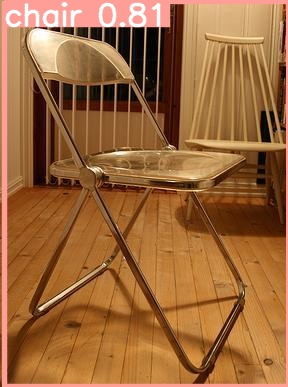

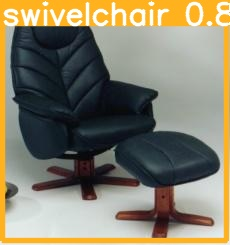

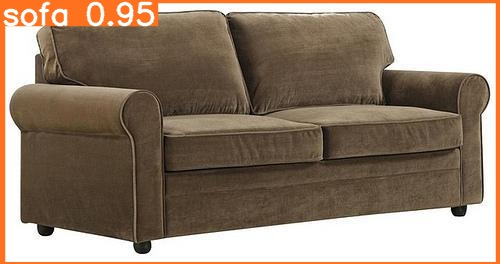

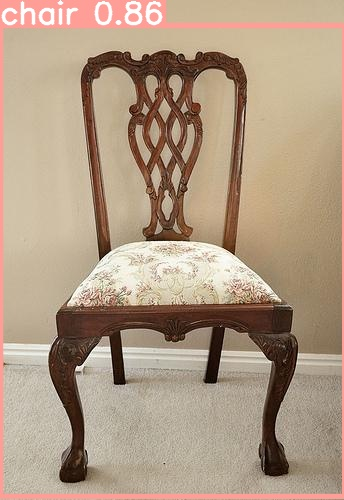

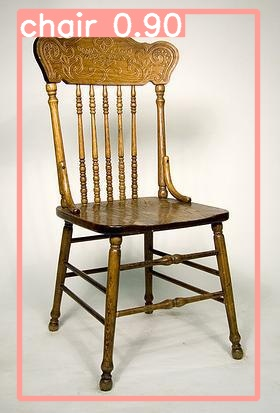

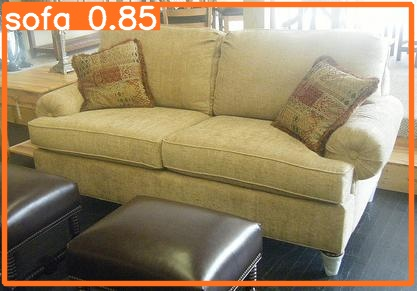

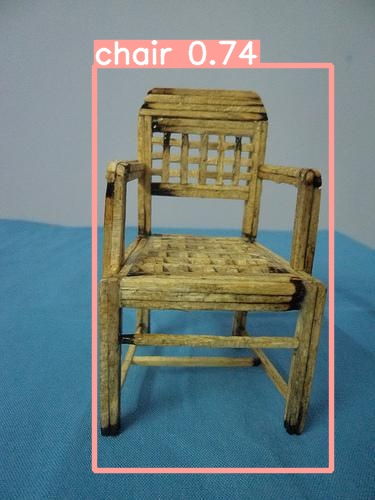

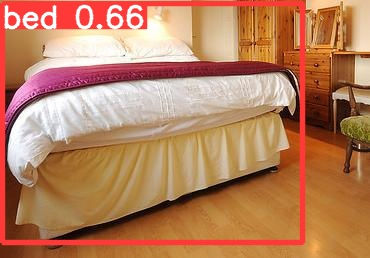

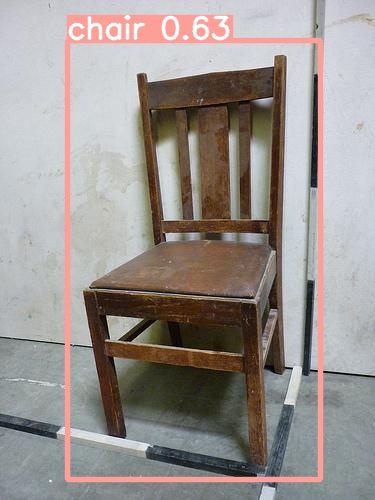

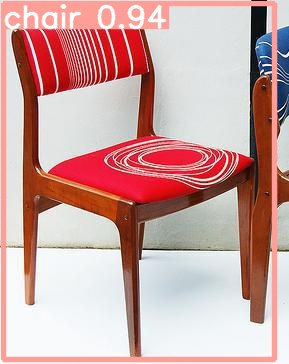

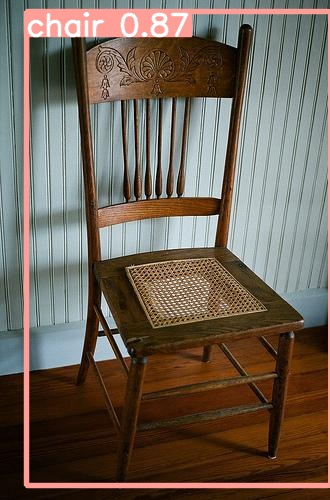

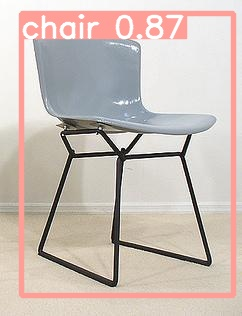

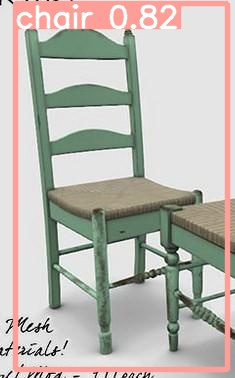

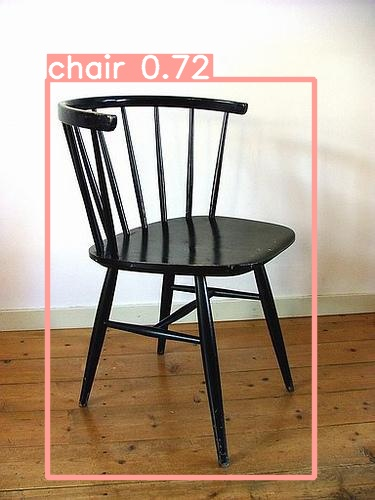

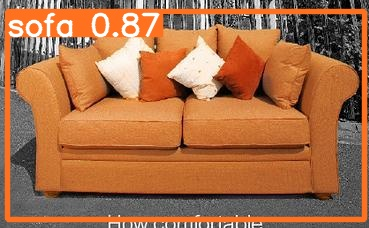

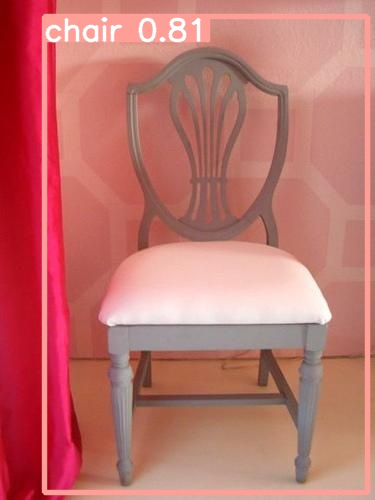

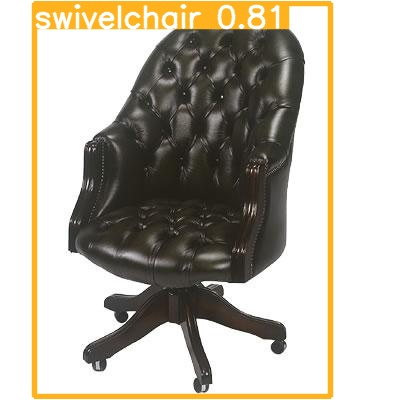

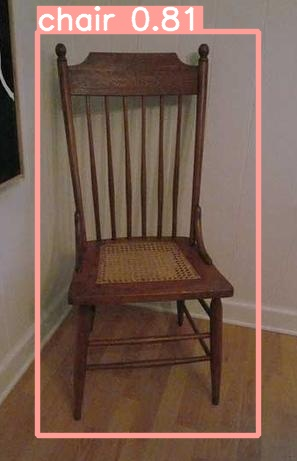

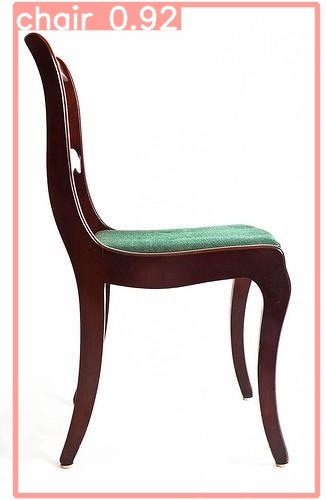

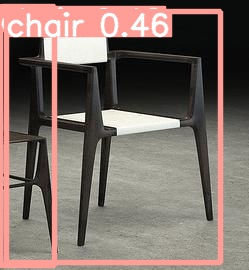

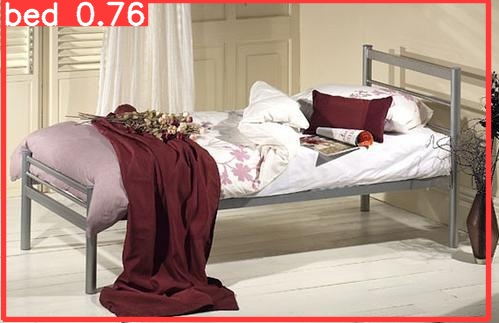

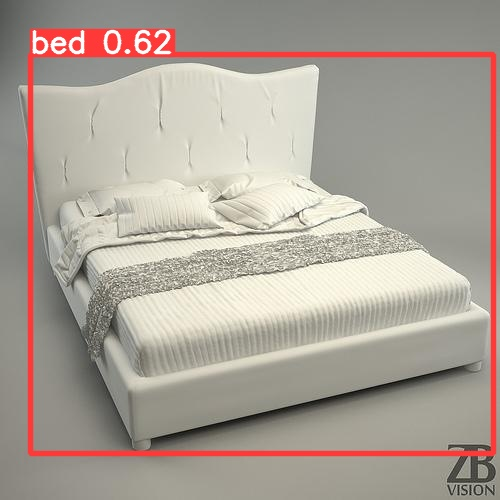

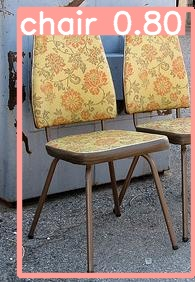

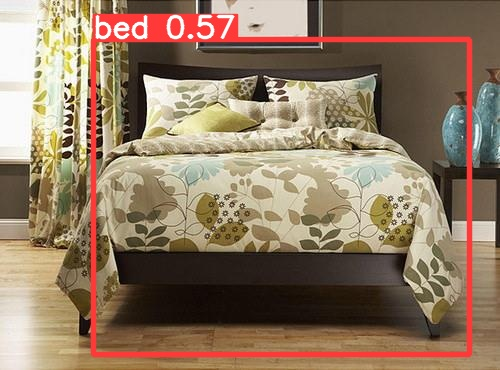

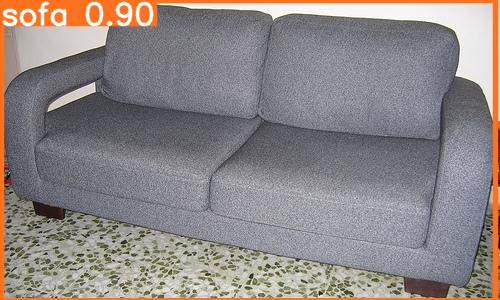

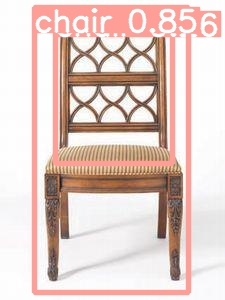

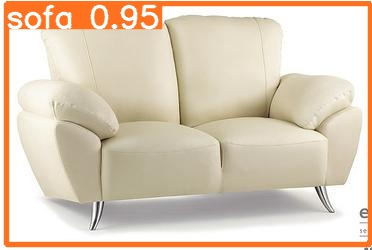

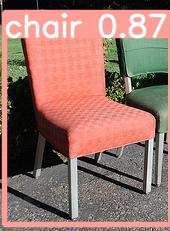

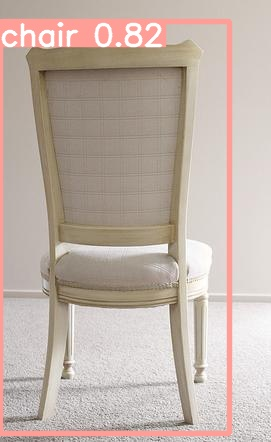

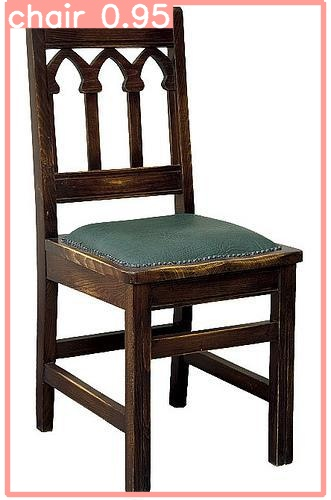

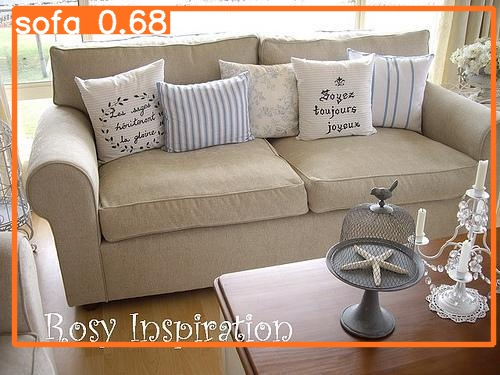

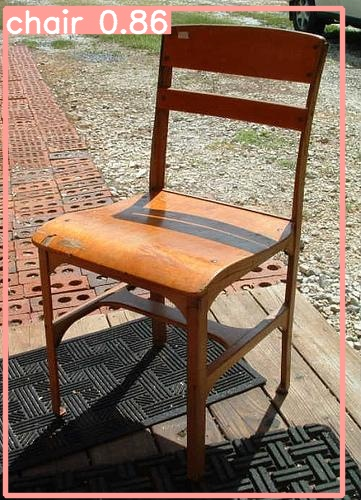

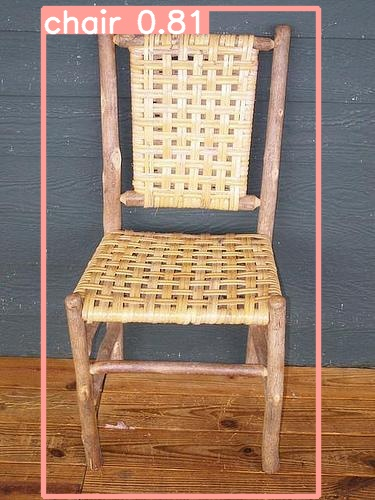

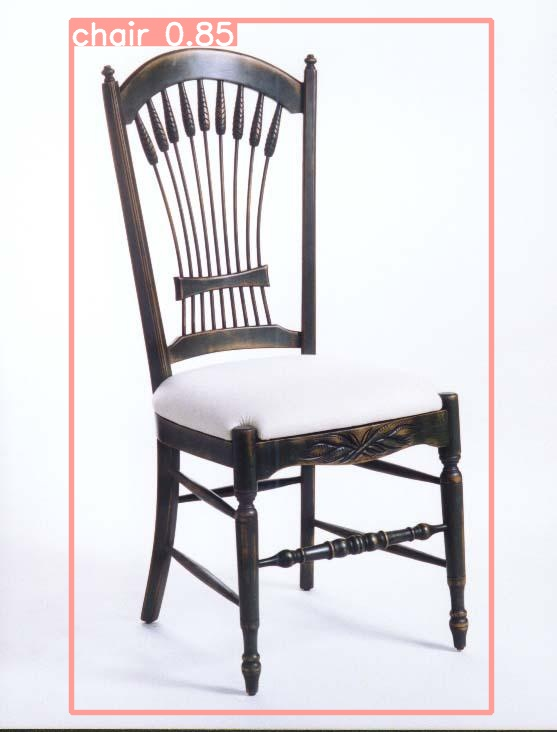

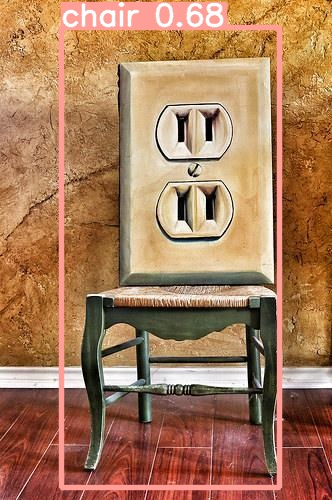

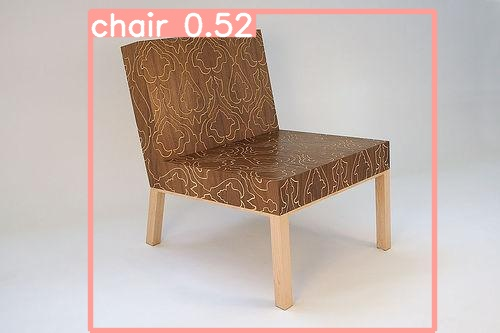

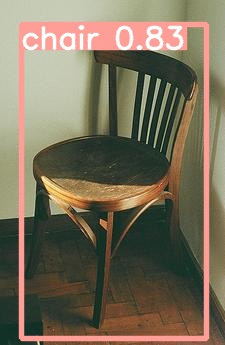

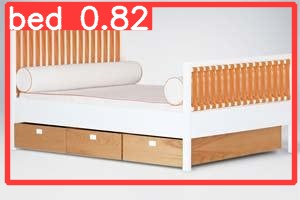

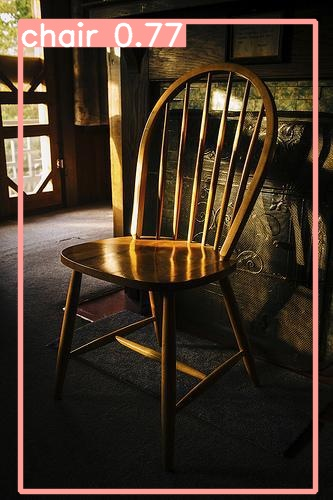

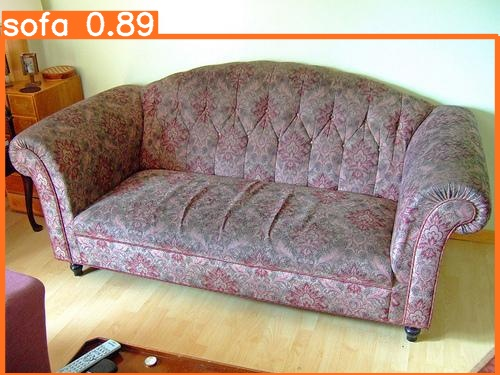

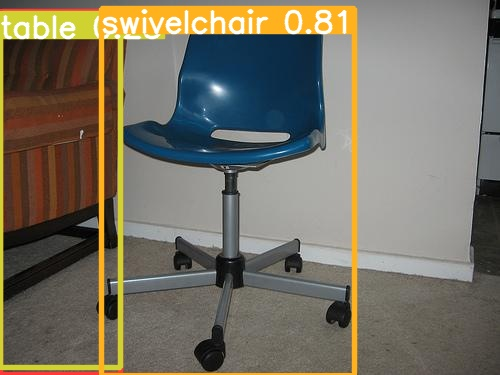

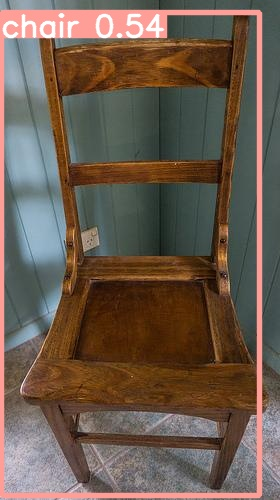

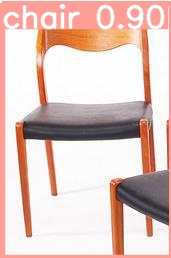

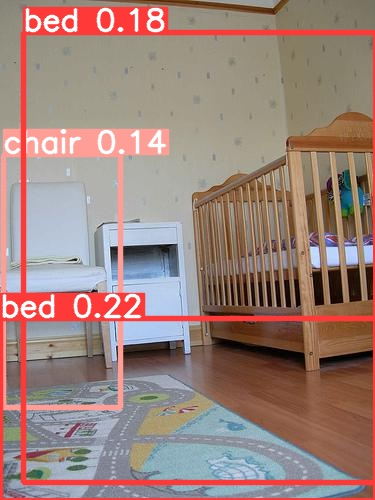

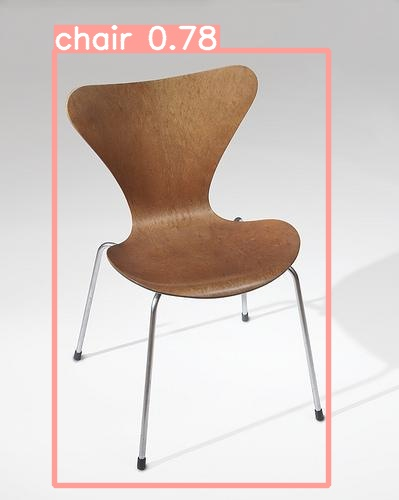

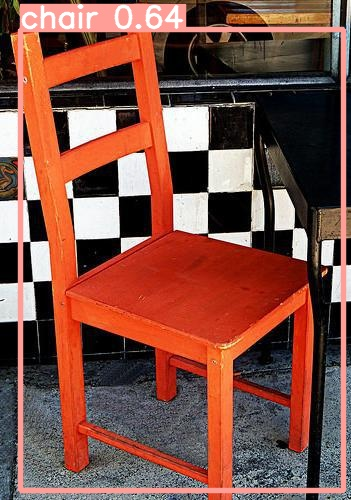

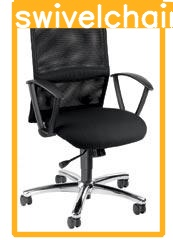

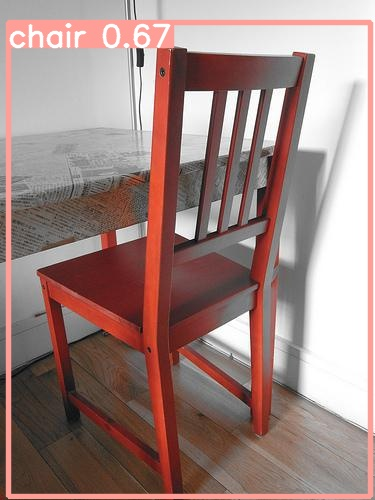

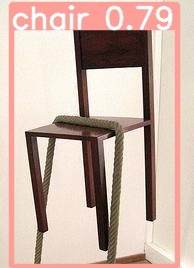

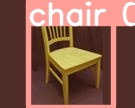

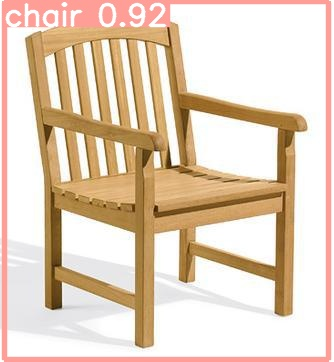

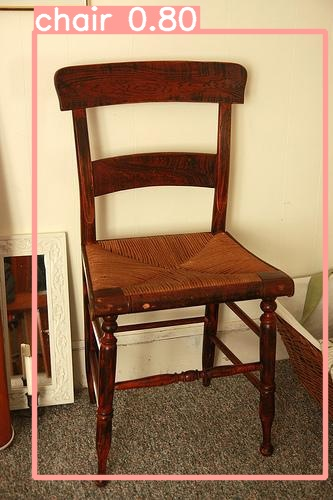

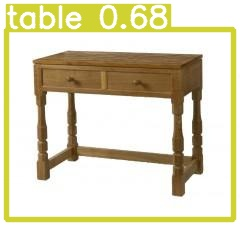

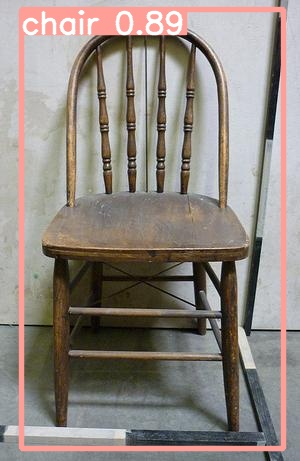

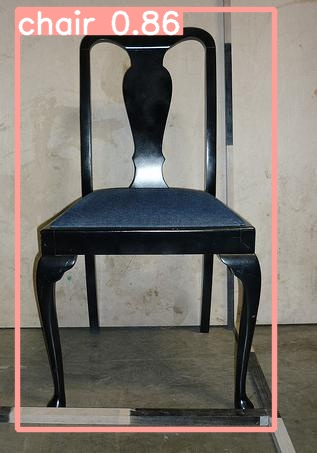

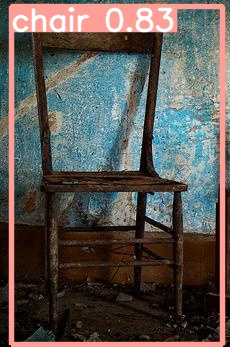

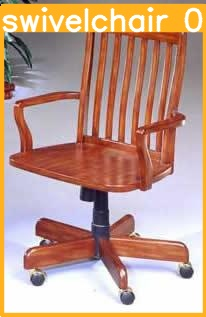

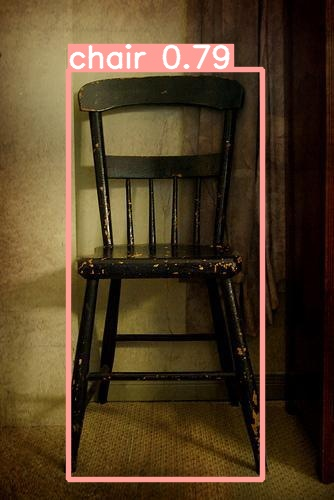

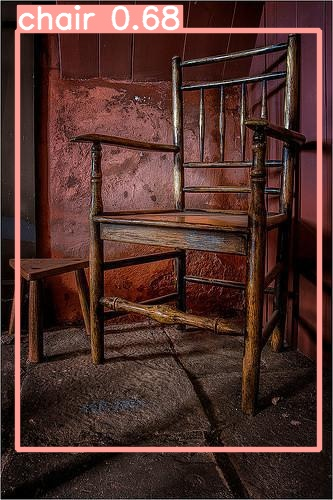

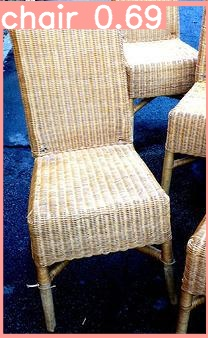

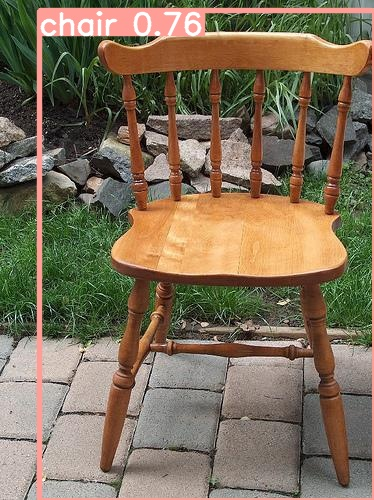

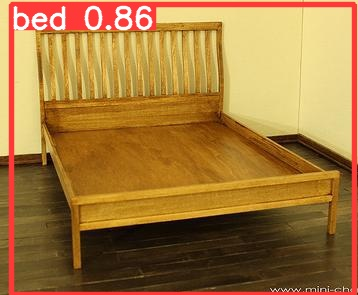

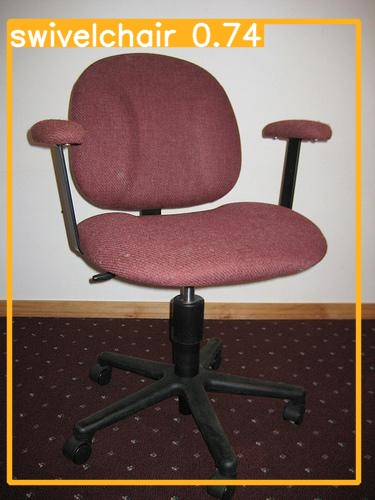

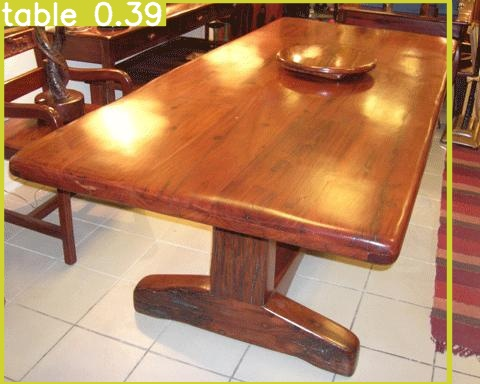

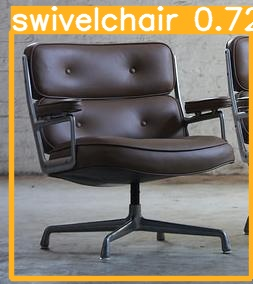

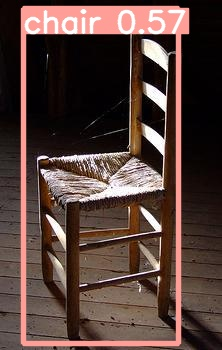

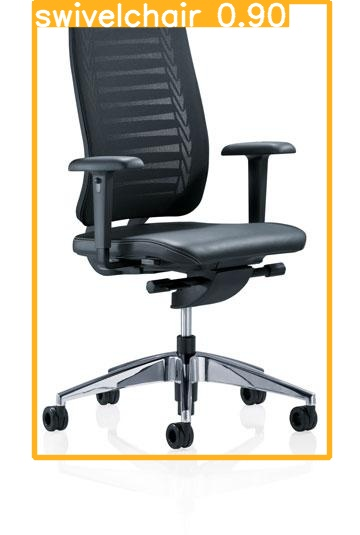

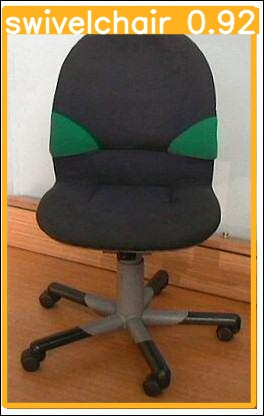

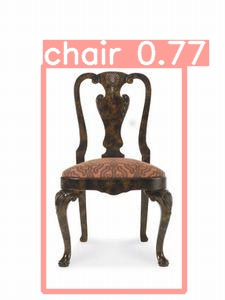

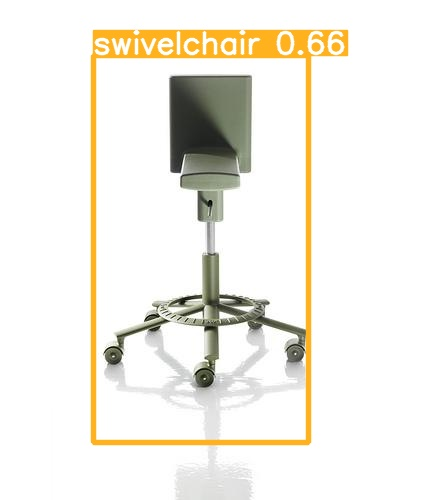

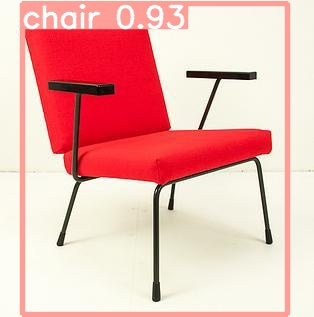

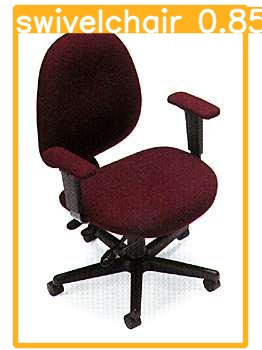

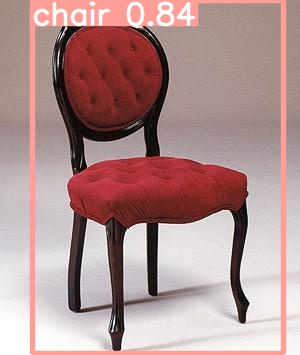

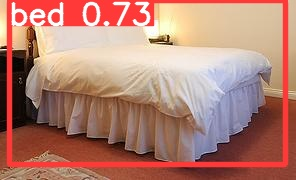

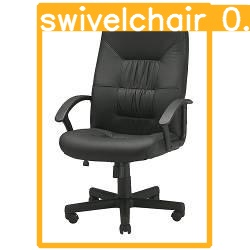

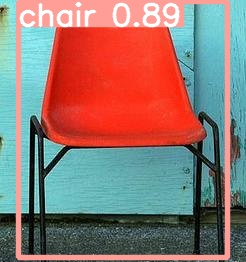

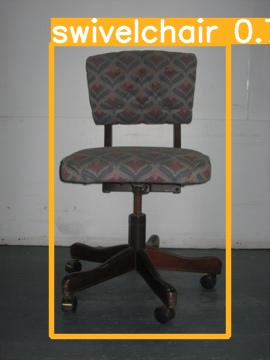

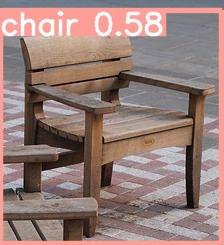

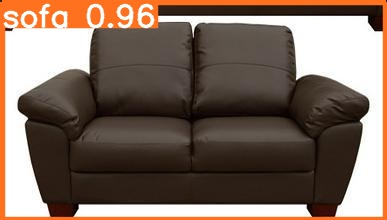

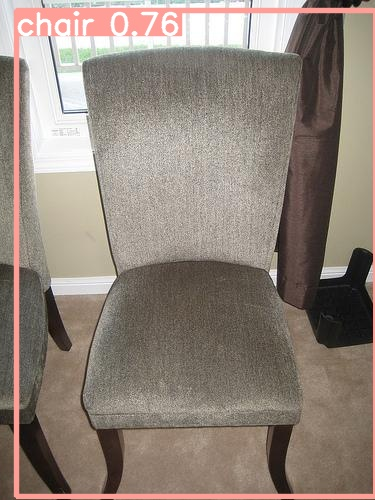

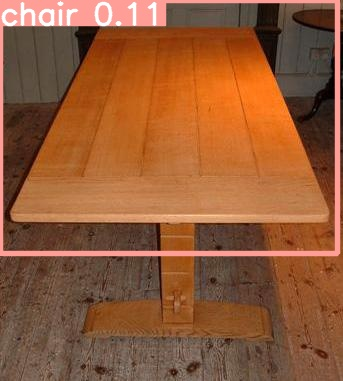

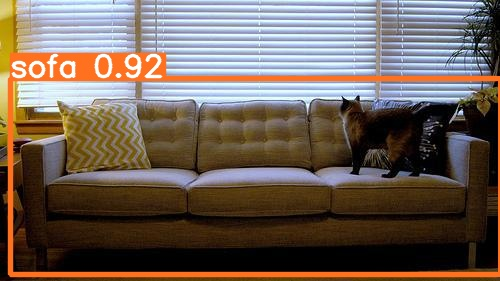

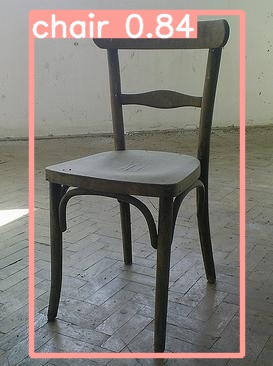

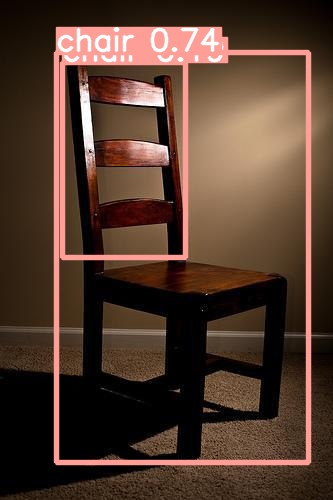

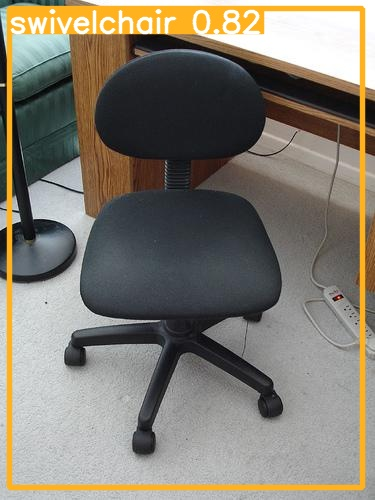

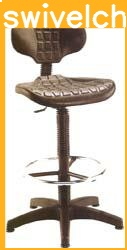

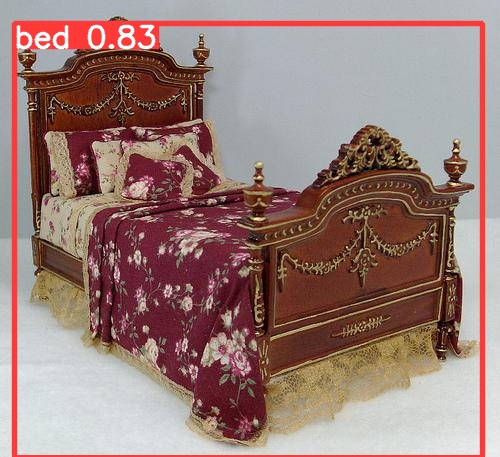

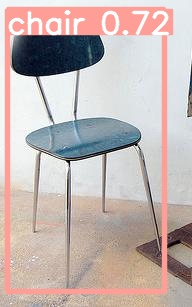

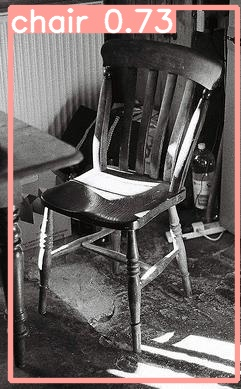

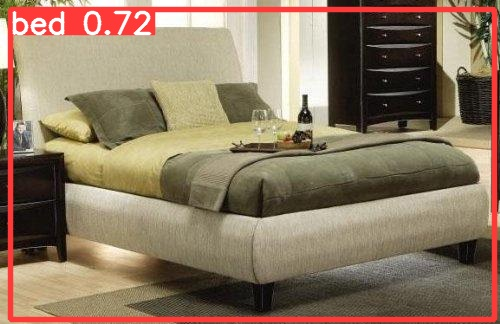

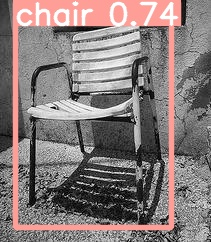

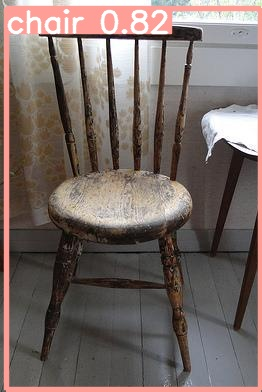

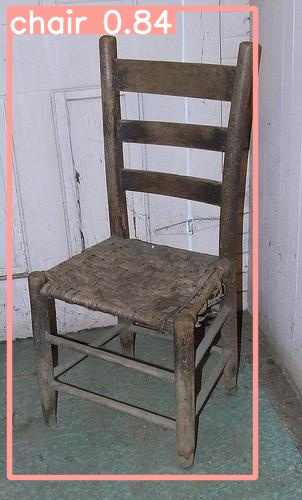

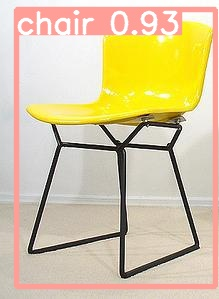

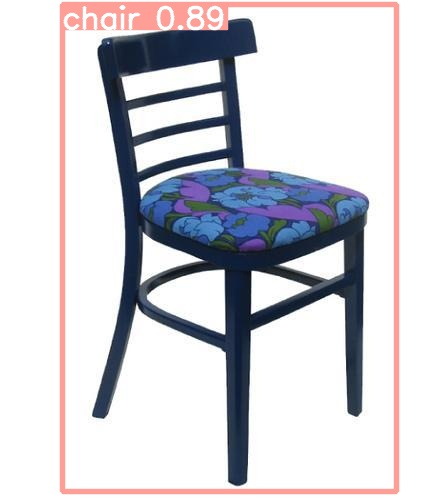

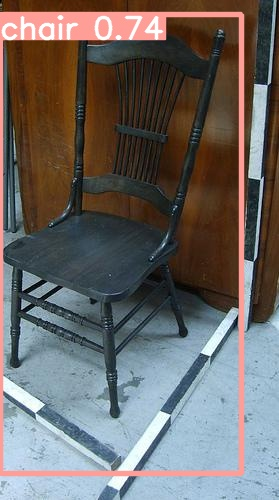

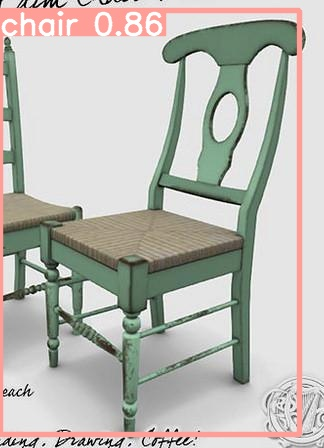

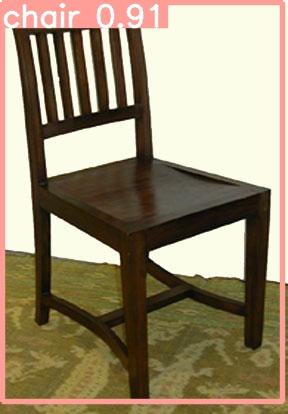

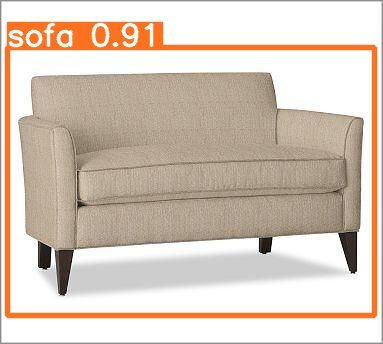

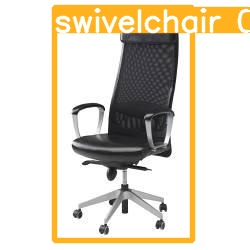

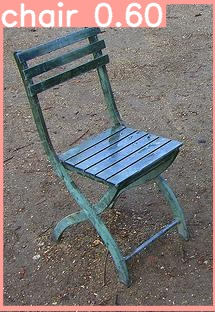

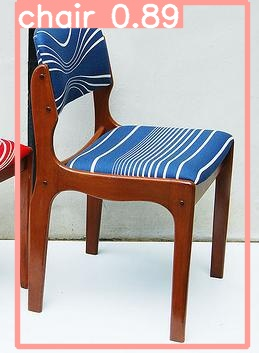

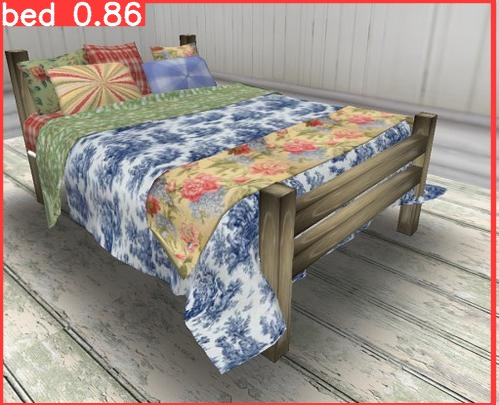

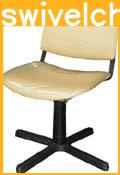

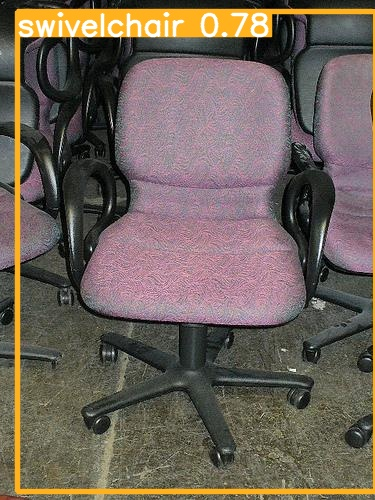

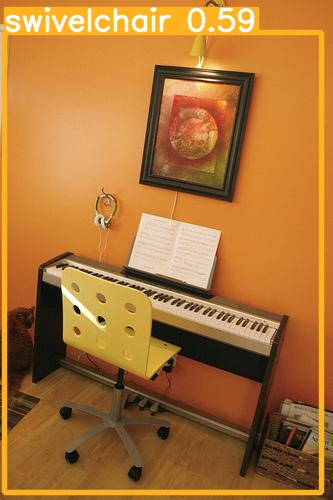

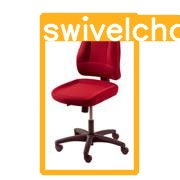

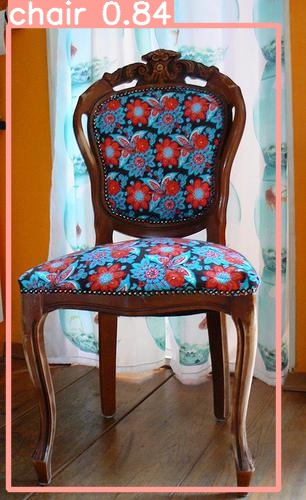

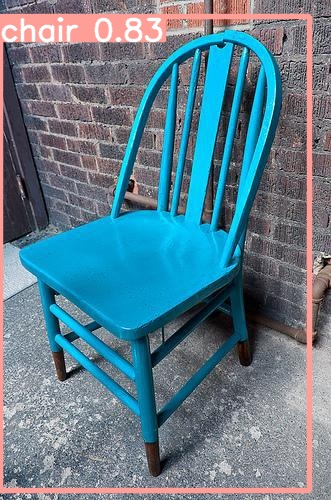

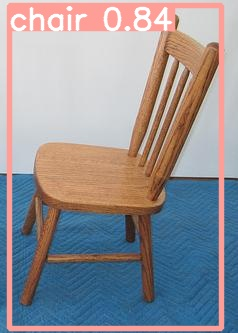

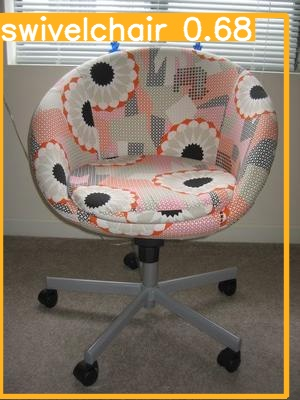

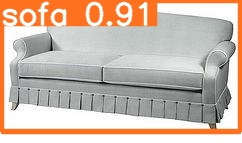

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp2/weights/last.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>